Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [3]:
NICKNAME = "tttonyalpha"

---

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [5]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = 0
    x_n = x0
    niter = 0
    while (abs(x - x_n) > eps) and (niter < maxiter):
        x = x_n
        x_n = x - f(x)/fder(x)
        niter += 1
    return x_n, niter

In [6]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

In [7]:
r, n = newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, x0 = -0.5) 
print("root:", r, ',',' iterations:', n)

r, n = newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, x0 = 10) #second root
print("root:", r, ',',' iterations:', n)

root: -1.000000000000001 ,  iterations: 5
root: 1.0000000000139897 ,  iterations: 7


# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [8]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = 0
    x_n = x0
    niter = 0
    while (abs(x - x_n) > eps) and (niter < maxiter):
        x = x_n
        x_n = x - m*f(x)/fder(x) # домножили на m
        niter += 1
    return x_n, niter

In [9]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

In [10]:
r = [0]*6
n = [0]*6
for i in range(6):
    r[i], n[i] = mod_newton(lambda x: (x**2 - 1)**2, lambda x: 4*x*(x**2 - 1), x0 = -2, m = i+1)
    print('m =', i+1,',', ' iterations: ', n[i],',', ' root =', round(r[i],5), '\n')
    
print('-' *110)
r = [0]*6
n = [0]*6
for i in range(6):
    r[i], n[i] = mod_newton(lambda x: (x**2 - 1)**2, lambda x: 4*x*(x**2 - 1), x0 = 10, m = i+1)
    print('m =', i+1,',', ' iterations: ', n[i],',', ' root =', round(r[i],5), '\n')

m = 1 ,  iterations:  18 ,  root = -1.00001 

m = 2 ,  iterations:  5 ,  root = -1.0 

m = 3 ,  iterations:  17 ,  root = -1.0 

m = 4 ,  iterations:  100 ,  root = -2.0 

m = 5 ,  iterations:  100 ,  root = -5.77602 

m = 6 ,  iterations:  100 ,  root = 0.13772 

--------------------------------------------------------------------------------------------------------------
m = 1 ,  iterations:  24 ,  root = 1.00001 

m = 2 ,  iterations:  7 ,  root = 1.0 

m = 3 ,  iterations:  17 ,  root = 1.0 

m = 4 ,  iterations:  100 ,  root = 10.0 

m = 5 ,  iterations:  100 ,  root = -11.82374 

m = 6 ,  iterations:  100 ,  root = -5.75389 



# Part III. Newton's fractal.

(4 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the **{basins of attraction}** of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


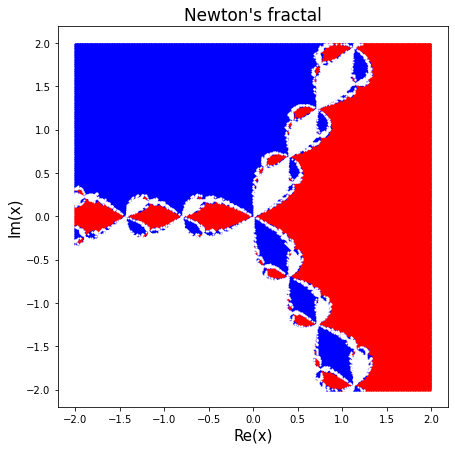

In [11]:
import cmath

res = 500 #"Разрешение"
n = 2 

r1 = np.zeros((1,2))
r2 = np.zeros((1,2))
r3 = np.zeros((1,2))

for i in range(res):
    for k in range(res):
        
        x = 2*n*i/res - n
        y = 2*n*k/res - n
        
        r, n1 = newton_iteration(lambda x: x**3 - 1, lambda x: 3*x**2, x+y*1j)
        
        #Расстояние до корней
        dr1 = abs(r - 1)
        dr2 = abs(r - cmath.e**(2/3 * cmath.pi * 1j))
        dr3 = abs(r - cmath.e**(4/3 * cmath.pi * 1j))
        
        delta = min(dr1, dr2, dr3)
        
        if delta == dr1:
            r1 = np.append(r1, [[x, y]], axis=0)
        elif delta == dr2:
            r2 = np.append(r2, [[x, y]], axis=0)
        else:
            r3 = np.append(r3, [[x, y]], axis=0)

plt.figure(figsize=(7,7))
plt.xlabel('Re(x)', fontsize=15)
plt.ylabel("Im(x)", fontsize=15)
plt.title("Newton's fractal", fontsize=17)

plt.plot(r1[1:,0], r1[1:,1], 'o', ms=1, color="red")
plt.plot(r2[1:,0], r2[1:,1], 'o', ms=1, color="blue")
plt.plot(r3[1:,0], r3[1:,1], 'o', ms=1, color="white")

# Часть IV. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [22]:
import scipy.special as sp, scipy.integrate, scipy.linalg as lg

def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Якобиан `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x1 = X0
    xn = X0 + 2 * eps
    k = 0
    while np.linalg.norm(x1 - xn) >= eps and k < maxiter:
        xn = x1
        x1 = xn + scipy.linalg.solve(jcb(xn), -F(xn))
        k += 1
    X, nit = x1, k
    return X, nit

In [23]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [26]:
import sympy as sp

def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    r"""Return the Jacobian of `func2(X)`.
    
    
    The Jacobian matrix is defined as 
    
    $$
    J_{ij} = \partial f_i / \partial x_j
    $$
    
    so that the first row contains the derivatives of $f_0$
    with respect to the first, second etc coordinates; the second
    row contains the derivatives of $f_1$ with respect to
    the first, second etc coordinates; and so on.
    """
    x_v, y_v, z_v = X
    x, y, z = sp.symbols('x y z')
    f1, f2, f3 = func2([x, y, z])
    F = sp.Matrix([f1, f2, f3])
    J = F.jacobian([x, y ,z])
    s = (x, y, z)
    J_func = sp.lambdify(s, J, modules='numpy')
    J_ev = J_func(x_v, y_v, z_v)
    
    return J_ev


In [27]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [ ]:
# more testing in this cell, keep it intact
